# Learning graph from data

In [9]:
## import module
from CGmodelselection.graph import get_graph_from_data

**Specify the data to be used**

Specify filename an optionally columns that shall not be loaded in the variable *drop*.

In [15]:
## chose one dataset here (or enter your own), list columns not to be loaded in variable <drop>
#filename = "unittest_data/australian-crabs.csv"
#drop =['index']

filename = "datasets/house_complete.csv"
drop = []

#filename = "datasets/titanic.csv"
#drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

In [16]:
import pandas as pd
df = pd.read_csv(filename, index_col=0)#, sep=',')
df.head()#df.to_csv("datasets/girona_hgi_cormophyta.csv")
#df.identifiedby = df.identifiedby.fillna('nan')
#sorted(df.identifiedby.unique())

,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
LotArea,,,,,,,,,,,,,,,,,,,,,
8450,Pave,Lvl,Gtl,1Fam,2Story,7,5,2003,2003,Gd,...,61,0,0,0,0,0,2,2008,Normal,208500.0
9600,Pave,Lvl,Gtl,1Fam,1Story,6,8,1976,1976,TA,...,0,0,0,0,0,0,5,2007,Normal,181500.0
11250,Pave,Lvl,Gtl,1Fam,2Story,7,5,2001,2002,Gd,...,42,0,0,0,0,0,9,2008,Normal,223500.0
9550,Pave,Lvl,Gtl,1Fam,2Story,7,5,1915,1970,TA,...,35,272,0,0,0,0,2,2006,Abnorml,140000.0
14260,Pave,Lvl,Gtl,1Fam,2Story,8,5,2000,2000,Gd,...,84,0,0,0,0,0,12,2008,Normal,250000.0


In [17]:
df.columns

Index(['Street', 'LandContour', 'LandSlope', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

Disable autoscrolling for outputs.

In [18]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Learn the (weighted) graph**

Filename: datasets/house_complete.csv
Using a dataset with 2919 samples, 13 discrete and 25 continuous variables.
Discrete Variables: ['Street', 'LandContour', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition']
Continuous Variables: ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Solving problem.. Done.


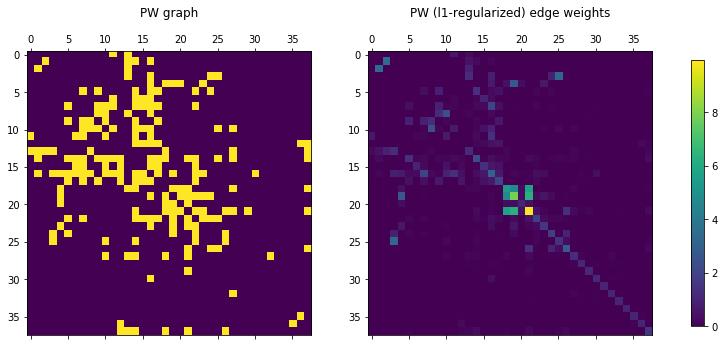

Legend:
0 - Street
1 - LandContour
2 - LandSlope
3 - BldgType
4 - HouseStyle
5 - ExterQual
6 - ExterCond
7 - Foundation
8 - Heating
9 - HeatingQC
10 - CentralAir
11 - PavedDrive
12 - SaleCondition
13 - LotArea
14 - OverallQual
15 - OverallCond
16 - YearBuilt
17 - YearRemodAdd
18 - 1stFlrSF
19 - 2ndFlrSF
20 - LowQualFinSF
21 - GrLivArea
22 - FullBath
23 - HalfBath
24 - BedroomAbvGr
25 - KitchenAbvGr
26 - TotRmsAbvGrd
27 - Fireplaces
28 - WoodDeckSF
29 - OpenPorchSF
30 - EnclosedPorch
31 - 3SsnPorch
32 - ScreenPorch
33 - PoolArea
34 - MiscVal
35 - MoSold
36 - YrSold
37 - SalePrice


In [19]:
## parameters for graph estimation
standardize = True # standardize data before learning (recommended)
kS = 2 # trade-off parameter for l1-regularization term
model = 'PW' # choose from 'PW' (pairwise model) and 'CLZ' (CLZ model with triple interactions)
graphthreshold = 1e-1 # threshold for graph

## get matrix of group-norms (grpnormmat), graph (graph), and legend for row-/column names (dictionary dlegend)
grpnormmat, graph, dlegend = get_graph_from_data(filename, drop = drop, model = model,
                                                 graphthreshold = graphthreshold, standardize = standardize, kS = kS)

**We might also want to rank the edges in terms of their respective edge weights (i.e., their corresponding group-norms).**

In [20]:
from CGmodelselection.graph import order_edges_by_weight

all_ordered_edges = order_edges_by_weight(grpnormmat, disp = True, graphthreshold = graphthreshold)


Edge	Edgeweight
21-19	6.33
21-18	5.76
19-18	4.75
2-1	3.47
25-3	3.27
19-4	2.69
10-8	2.44
16-7	2.06
16-11	1.38
26-21	1.36
14-5	1.36
9-8	1.29
13-3	1.25
15-6	0.95
26-24	0.94
16-10	0.93
13-2	0.90
24-3	0.89
9-7	0.86
9-5	0.85
16-3	0.83
16-4	0.71
11-10	0.71
17-16	0.67
16-15	0.65
17-9	0.65
23-4	0.64
11-0	0.63
23-19	0.57
17-12	0.54
22-21	0.49
13-1	0.48
15-10	0.47
17-15	0.47
16-12	0.46
21-20	0.46
18-4	0.44
17-5	0.43
17-7	0.41
30-16	0.37
16-14	0.35
7-5	0.35
22-16	0.35
23-16	0.35
37-14	0.34
20-19	0.34
26-25	0.33
20-4	0.32
16-6	0.31
23-22	0.31
20-18	0.29
14-1	0.27
16-5	0.27
21-14	0.27
36-12	0.27
37-21	0.27
14-11	0.26
27-21	0.25
15-7	0.25
22-19	0.24
13-0	0.24
24-19	0.23
22-17	0.23
14-7	0.23
16-8	0.21
15-12	0.21
25-10	0.20
37-26	0.20
11-7	0.19
14-12	0.19
27-14	0.19
37-13	0.19
24-22	0.19
29-21	0.19
14-10	0.18
19-16	0.18
24-5	0.17
13-8	0.17
10-9	0.16
25-22	0.16
16-1	0.16
27-18	0.16
22-7	0.15
18-13	0.15
18-14	0.15
17-14	0.15
25-14	0.15
22-14	0.15
14-6	0.14
32-27	0.13
14-9	0.13
22-5	0.12
23-21	0.12
11-6	

In [18]:
# print all edges
all_ordered_edges

[(14.031294738641662, (56, 1)),
 (13.989103879350052, (21, 1)),
 (13.989010329531602, (71, 1)),
 (13.948497045590004, (97, 1)),
 (13.945332584285124, (61, 1)),
 (13.903308671442813, (28, 1)),
 (13.890069665287283, (96, 1)),
 (13.85246390177028, (76, 1)),
 (13.831273554962646, (83, 1)),
 (13.818036482152159, (92, 1)),
 (13.776285000819668, (6, 1)),
 (13.766886997616943, (52, 1)),
 (13.762450645557834, (78, 1)),
 (13.745185852148706, (65, 1)),
 (13.72818288378334, (60, 1)),
 (13.727458176271373, (37, 1)),
 (13.726933255136435, (22, 1)),
 (13.725043210857468, (54, 1)),
 (13.724478294008925, (87, 1)),
 (13.717448762547628, (80, 1)),
 (13.716615860309023, (53, 1)),
 (13.698984224092433, (38, 1)),
 (13.693962939343745, (46, 1)),
 (13.686438849524659, (43, 1)),
 (13.686113092021859, (39, 1)),
 (13.67398575568575, (42, 1)),
 (13.67117654194559, (27, 1)),
 (13.658737472059114, (16, 1)),
 (13.653808512394038, (35, 1)),
 (13.624037583574562, (17, 1)),
 (13.612983155380936, (49, 1)),
 (13.60752930